In [5]:
import pandas as pd 

data = pd.read_csv('data.csv')

Check coverage of ward

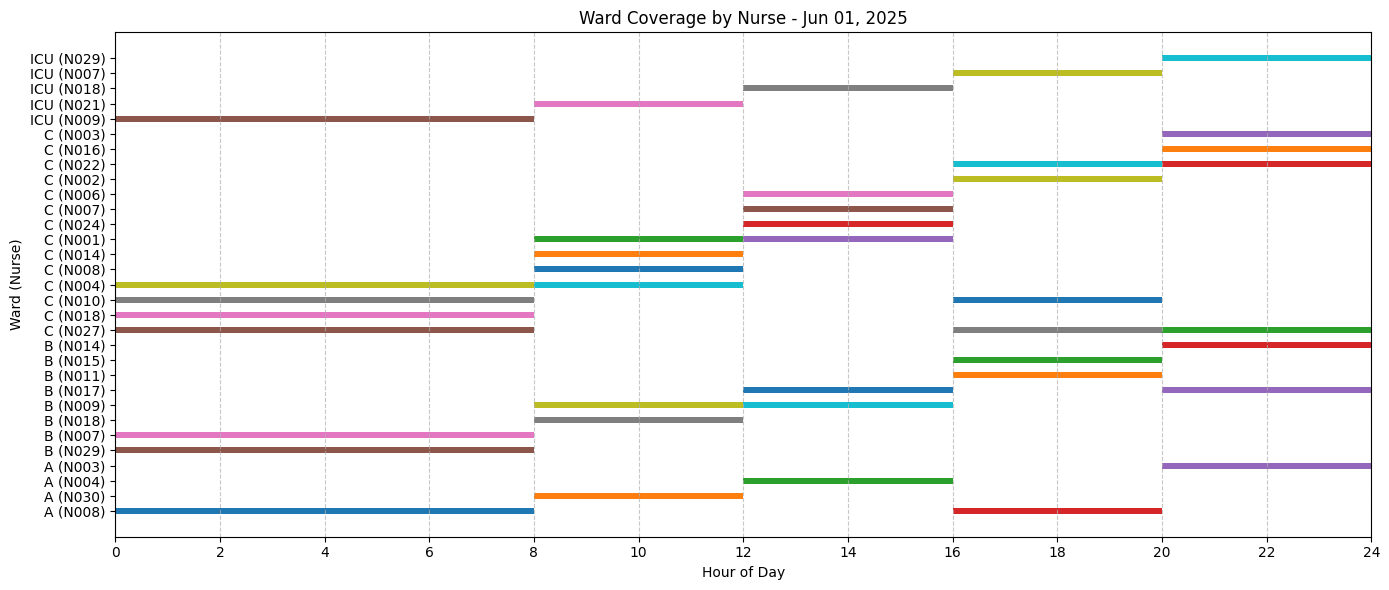

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("schedule.csv")  # Adjust path if needed

# Convert date and time columns
df['start_time'] = pd.to_timedelta(df['start_time'])
df['end_time'] = pd.to_timedelta(df['end_time'])
df['date'] = pd.to_datetime(df['date'])

# Select only the first date
first_date = df['date'].min().date()
df_day = df[df['date'].dt.date == first_date]

# Plot for one day
plt.figure(figsize=(14, 6))
for _, row in df_day.iterrows():
    plt.barh(
        y=f"{row['ward']} ({row['nurse_id']})",
        width=(row['end_time'] - row['start_time']).total_seconds() / 3600,
        left=row['start_time'].total_seconds() / 3600,
        height=0.4,
    )

plt.title(f"Ward Coverage by Nurse - {first_date.strftime('%b %d, %Y')}")
plt.xlabel("Hour of Day")
plt.ylabel("Ward (Nurse)")
plt.xlim(0, 24)
plt.xticks(range(0, 25, 2))
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


Check if nurse work 80 hourse per fortnight 

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("schedule.csv")
df['date'] = pd.to_datetime(df['date'])

# Group into fortnight buckets (every 14 days starting from earliest date)
start_date = df['date'].min()
df['fortnight'] = ((df['date'] - start_date).dt.days // 14) + 1

# Sum hours per nurse per fortnight
summary = df.groupby(['nurse_id', 'fortnight'])['duration_hours'].sum().reset_index()

# Identify nurses not meeting 80 hours per fortnight
violations = summary[summary['duration_hours'] < 80]

# Display those who failed to meet the target
print("Nurses who worked less than 80 hours in any fortnight:")
print(violations)

# Optional: show all nurses' work hours for comparison
print("\nAll nurse workloads per fortnight:")
print(summary)


Nurses who worked less than 80 hours in any fortnight:
    nurse_id  fortnight  duration_hours
3       N001          4              56
5       N002          1              64
12      N003          3              56
13      N003          4              68
14      N003          5              56
15      N004          1              76
18      N004          4              72
20      N005          1              68
23      N005          4              68
26      N006          2              56
31      N007          2              68
33      N007          4              60
42      N009          3              68
45      N010          1              64
47      N010          3              64
49      N010          5              76
50      N011          1              56
55      N012          1              72
57      N012          3              72
60      N013          1              64
63      N013          4              76
68      N014          4              68
69      N014          5  